# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup 
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import pandas as pd
import requests
import datetime as dt
from datetime import timedelta
from datetime import datetime

In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html). Inspect the page to identify which elements to scrape. Note that the URL is `https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html`.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)
#response = browser.html
response=requests.get(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
soup = BeautifulSoup(response.text, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="" name="description"/>
  <meta content="Mark Otto, Jacob Thornton, and Bootstrap contributors" name="author"/>
  <meta content="Hugo 0.84.0" name="generator"/>
  <title>
   Mars Temperature Data
  </title>
  <link href="https://getbootstrap.com/docs/5.0/examples/jumbotron/" rel="canonical"/>
  <!-- Bootstrap core CSS -->
  <link crossorigin="anonymous" href="https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/css/bootstrap.min.css" integrity="sha384-ggOyR0iXCbMQv3Xipma34MD+dH/1fQ784/j6cY/iJTQUOhcWr7x9JvoRxT2MZw1T" rel="stylesheet"/>
  <style>
   .bd-placeholder-img {
      font-size: 1.125rem;
      text-anchor: middle;
      -webkit-user-select: none;
      -moz-user-select: none;
      user-select: none;
    }

    @media (min-width: 768px) {
      .bd-placeholder-img-lg {
        font-size: 3.5rem;
      }
    }
  </style>
 </head

In [5]:
# Extract all rows of data
table=soup.find('table' )
print(table)


<table class="table">
<tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<td>-77.

In [6]:
row=soup.find('tr', class_="data-row")
print(row)          

<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
# Create an empty list
weather_mars=[]

# Loop through the scraped data to create a list of rows
for row in table.find_all('tr', class_="data-row"):
    mars_weather= row.find_all('td')
    #looping through the HTML table to scrape the data
    mars_weather_data=[td.text.strip() for td in mars_weather]
    weather_mars.append(mars_weather_data)   
#convert to dataframe

weather_mars

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [8]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_weather_df = pd.DataFrame(weather_mars, columns=["id" , "terrestrial_date" , "sol" , "ls", "month" , "min_temp", 
                                 "pressure"])


In [9]:
# Confirm DataFrame was created successfully
mars_weather_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [10]:
# Examine data type of each column
mars_weather_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [11]:
# Change data types for data analysis
mars_weather_df['terrestrial_date']=pd.to_datetime(mars_weather_df['terrestrial_date'])
mars_weather_df = mars_weather_df.astype({
                                           'id': 'int64',
                                           'sol': 'int64',
                                           'ls':'int64',
                                           'month':'int64',
                                           'min_temp':'float64',
                                           'pressure':'float64'
                                        })

In [12]:
# Confirm type changes were successful by examining data types again
mars_weather_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [13]:
# 1. How many months are there on Mars?
month_in_mars = mars_weather_df['month'].nunique()
print(f"There are {month_in_mars} in Mars from the observed data.")

There are 12 in Mars from the observed data.


In [14]:
# 2. How many Martian days' worth of data are there?
days_in_mars = mars_weather_df['sol'].nunique()
print(f"There are {days_in_mars} Martian days' worth of data.")

There are 1867 Martian days' worth of data.


In [15]:
# 3. What is the average low temperature by month?
ave_min_temp_month = mars_weather_df.groupby('month', as_index=False)['min_temp'].mean()
ave_min_temp_month.rename(columns = {'min_temp':'avg_min_temp'}, inplace = True)
ave_min_temp_month

,month,avg_min_temp
0,1,-77.160920
1,2,-79.932584
2,3,-83.307292
3,4,-82.747423
4,5,-79.308725
5,6,-75.299320
6,7,-72.281690
7,8,-68.382979
8,9,-69.171642
9,10,-71.982143


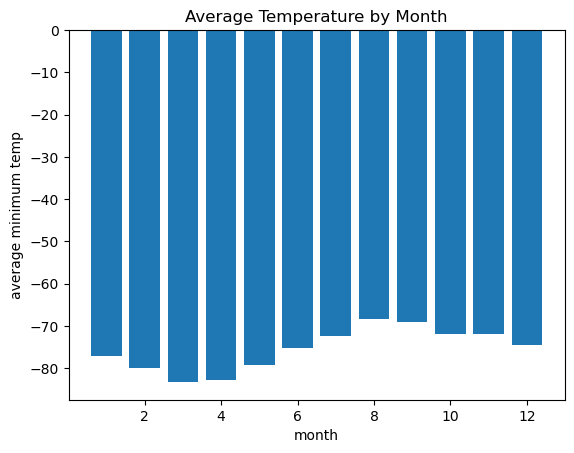

In [16]:
# Plot the average temperature by month
plt.bar(ave_min_temp_month['month'],ave_min_temp_month['avg_min_temp'])
plt.xlabel('month')
plt.ylabel('average minimum temp')
plt.title('Average Temperature by Month')
plt.show()


In [17]:
# Identify the coldest months in Curiosity's location
min_avg_temp = ave_min_temp_month['avg_min_temp'].min()
coldest_month=ave_min_temp_month.loc[ave_min_temp_month['avg_min_temp']==min_avg_temp]
coldest_month

,month,avg_min_temp
2,3,-83.307292


In [18]:
# Identify hottest months in Curiosity's location
max_avg_temp = ave_min_temp_month['avg_min_temp'].max()
hottest_month=ave_min_temp_month.loc[ave_min_temp_month['avg_min_temp']==max_avg_temp]
hottest_month


,month,avg_min_temp
7,8,-68.382979


In [19]:
# 4. Average pressure by Martian month
ave_pressure_month = mars_weather_df.groupby('month', as_index=False)['pressure'].mean()
ave_pressure_month.rename(columns = {'pressure':'avg_pressure'}, inplace = True)
ave_pressure_month

,month,avg_pressure
0,1,862.488506
1,2,889.455056
2,3,877.322917
3,4,806.329897
4,5,748.557047
5,6,745.054422
6,7,795.105634
7,8,873.829787
8,9,913.305970
9,10,887.312500


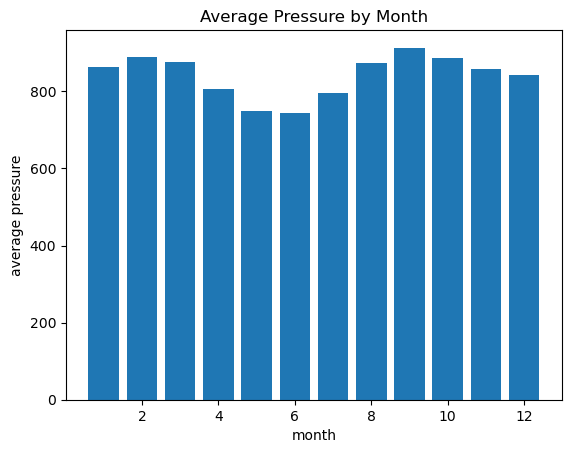

In [20]:
# Plot the average pressure by month
plt.bar(ave_pressure_month['month'],ave_pressure_month['avg_pressure'])
plt.xlabel('month')
plt.ylabel('average pressure')
plt.title('Average Pressure by Month')
plt.show()

In [21]:
# Identify the lowest pressure by month
min_avg_pressure = ave_pressure_month['avg_pressure'].min()
lowest_pressure_month=ave_pressure_month.loc[ave_pressure_month['avg_pressure']==min_avg_pressure]
lowest_pressure_month

,month,avg_pressure
5,6,745.054422


In [22]:
# Identify the highest pressure by month
max_avg_pressure = ave_pressure_month['avg_pressure'].max()
highest_pressure_month=ave_pressure_month.loc[ave_pressure_month['avg_pressure']==max_avg_pressure]
highest_pressure_month

,month,avg_pressure
8,9,913.30597


In [23]:
#checking the sol data for ls=o
ls0= mars_weather_df.loc[mars_weather_df['ls']==0]
ls0

,id,terrestrial_date,sol,ls,month,min_temp,pressure
304,320,2013-08-01,351,0,1,-75.0,853.0
305,319,2013-08-02,352,0,1,-77.0,854.0
925,954,2015-06-19,1019,0,1,-81.0,849.0
926,938,2015-06-20,1020,0,1,-63.0,832.0
1579,1606,2017-05-06,1688,0,1,-76.0,840.0
1580,1610,2017-05-07,1689,0,1,-75.0,840.0


In [24]:
#checking the sol data for ls=90
ls90= mars_weather_df.loc[mars_weather_df['ls']==90]
ls90

,id,terrestrial_date,sol,ls,month,min_temp,pressure
464,487,2014-02-16,544,90,4,-86.0,857.0
465,490,2014-02-17,545,90,4,-85.0,856.0
1118,1145,2016-01-04,1213,90,4,-84.0,851.0
1119,1144,2016-01-05,1214,90,4,-85.0,849.0
1770,1803,2017-11-20,1881,90,4,-79.0,832.0
1771,1801,2017-11-21,1882,90,4,-78.0,831.0


In [25]:
#checking the sol data for ls=180
ls180= mars_weather_df.loc[mars_weather_df['ls']==180]
ls180

,id,terrestrial_date,sol,ls,month,min_temp,pressure
40,196,2012-09-30,54,180,7,-72.0,766.0
41,197,2012-10-01,55,180,7,-74.0,766.0
643,666,2014-08-18,723,180,7,-73.0,761.0


In [26]:
#checking the sol data for ls=270
ls270= mars_weather_df.loc[mars_weather_df['ls']==270]
ls270

,id,terrestrial_date,sol,ls,month,min_temp,pressure
179,107,2013-02-24,197,270,10,-68.0,915.0
785,808,2015-01-11,865,270,10,-70.0,913.0
786,809,2015-01-12,866,270,10,-71.0,911.0
1428,1454,2016-11-29,1534,270,10,-73.0,898.0
1429,1455,2016-11-30,1535,270,10,-73.0,900.0


In [27]:
# Using the ls=o and index getting the corresponding sol 
start_ls = mars_weather_df['terrestrial_date'].loc[304]
start_ls

Timestamp('2013-08-01 00:00:00')

In [28]:
## Using the ls=o and index getting the corresponding sol 
end_ls=mars_weather_df['terrestrial_date'].loc[925]
end_ls

Timestamp('2015-06-19 00:00:00')

In [29]:
# 5. How many terrestrial (earth) days are there in a Martian year?
#calulating the no. of martian days using the solar longitude at an angle 0.
martian_year=end_ls-start_ls
print(f" There are {martian_year} approximately terrestrial (earth) days are there in a Martian year")

 There are 687 days 00:00:00 approximately terrestrial (earth) days are there in a Martian year


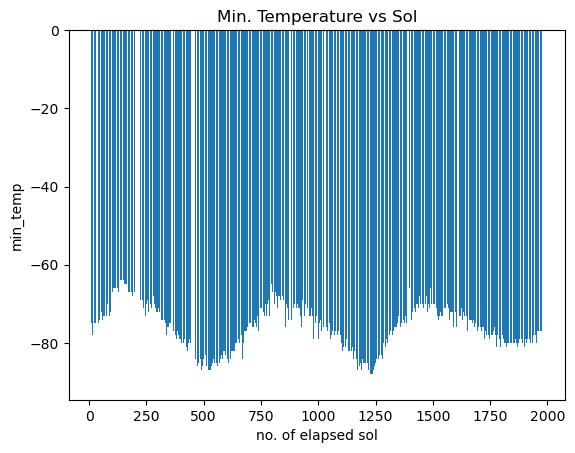

In [30]:
# Plot the min_temp by sol
plt.bar(mars_weather_df['sol'],mars_weather_df['min_temp'])
plt.xlabel('no. of elapsed sol')
plt.ylabel('min_temp')
plt.title('Min. Temperature vs Sol')
plt.show()

From the observed data of curiosity,
The coldest and warmest months of mars (at the location of curiosity) are thrid and eighth month.
The lowest and highest pressure by months of mars (at the location of curiosity) are sixth and ninth month.





First method to determine the terrestrial (earth) days in a Martian year is calculated by Subratcing the terrestrial_date column data of the Solar longitude at angle 0 at different time period, the result obatained was 687 days 00:00:00 approximately.

Second method to determine the terrestrial (earth) days in a Martian year is be plotting the Sol column with the Min_temp column. When measureing the difference between two peaks of minimum temperature which is 1230-550=680 days approximately.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [31]:
# Write the data to a CSV
mars_weather_df.to_csv('mars_data.csv', index=False)

In [32]:
browser.quit()